# Tarea 3
## Visualización

**Universidad del Valle de Guatemala**\
**Facultad de Ingeniería**\
**Departamento de Ciencias de la Computación**\
**Data Science**

### Integrantes
- Diego Leiva
- Pablo Orellana

## Librerias

In [1]:
# Datos
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
fracturas_df = pd.read_csv('data/cervical_fractures.csv')
consumos_df = pd.read_csv('data/fuel_consumption.csv')
seguros_df = pd.read_csv('data/insurance_policy.csv')

## Visualizaciones Originales

### Fracturas Cervicales

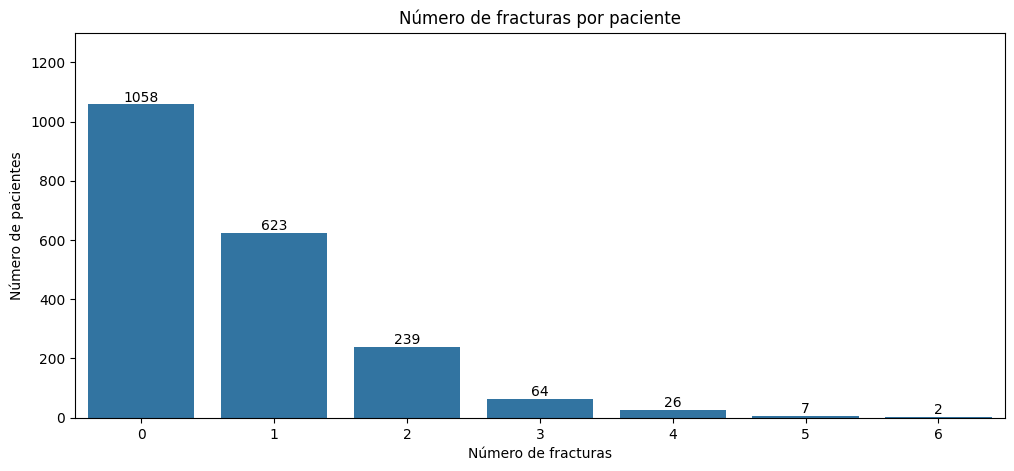

In [3]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Número de fracturas por paciente')
plt.xlabel('Número de fracturas')
plt.ylabel('Número de pacientes')
plt.ylim([0,1300])
plt.show()

### Consumos de Combustibles

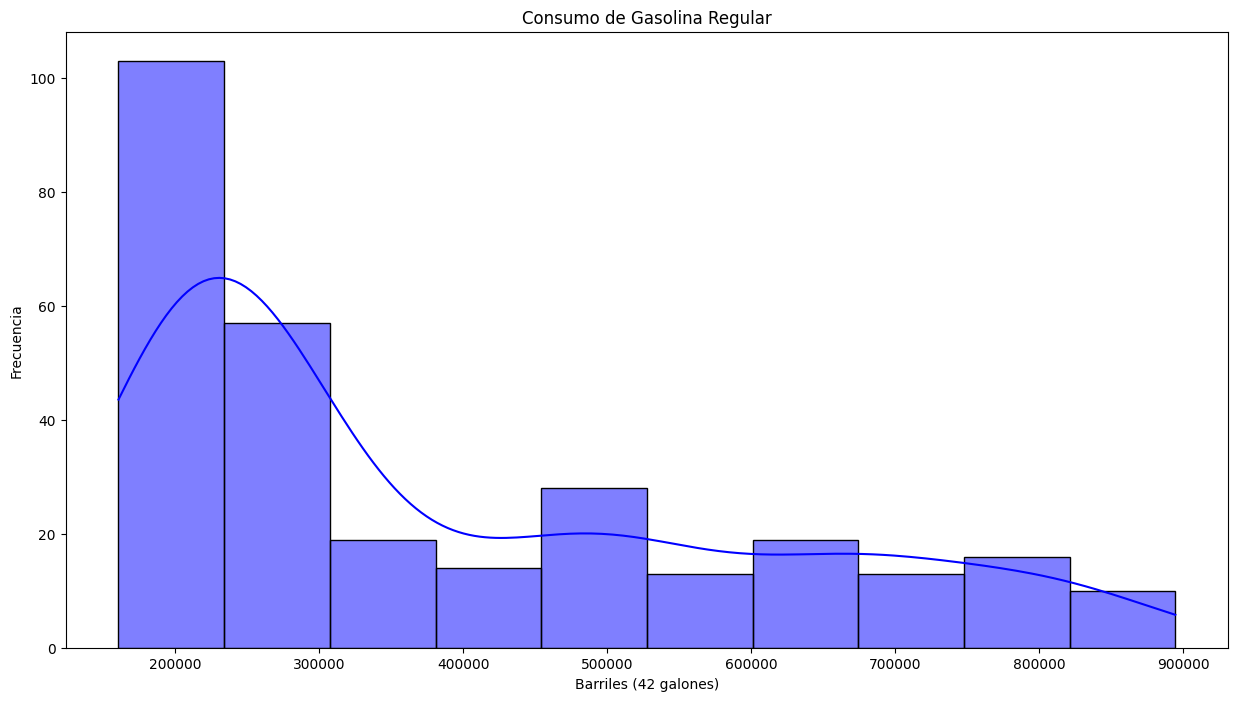

In [4]:
# Configuración de un solo plot para Consumo de Combustibles
plt.figure(figsize=(15, 8))
sns.histplot(consumos_df['Gasolina Regular'], kde=True, color='blue')
plt.title('Consumo de Gasolina Regular')
plt.xlabel('Barriles (42 galones)')
plt.ylabel('Frecuencia')
plt.show()

### Polizas de Seguros

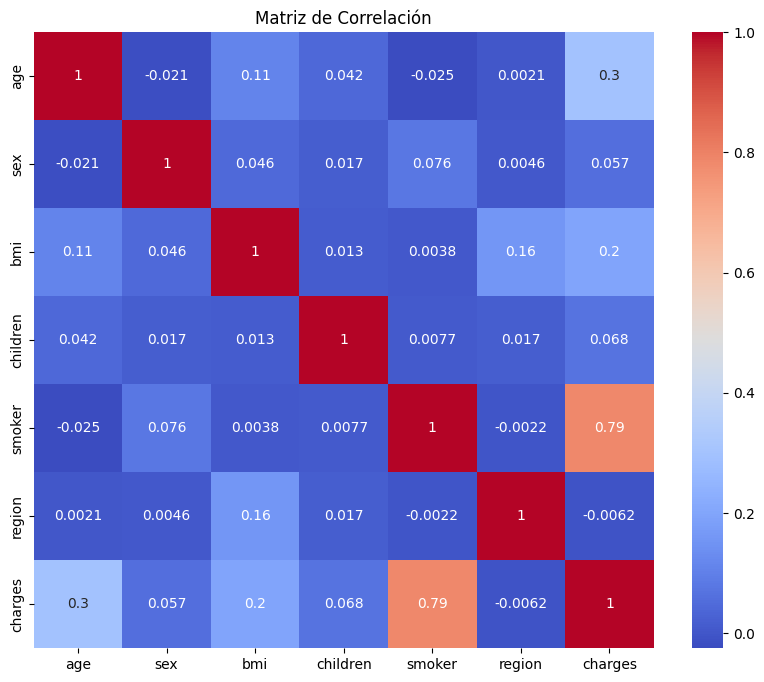

In [5]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Visualizaciones Mejoradas

### Audiencia sin conocimiento estadistico

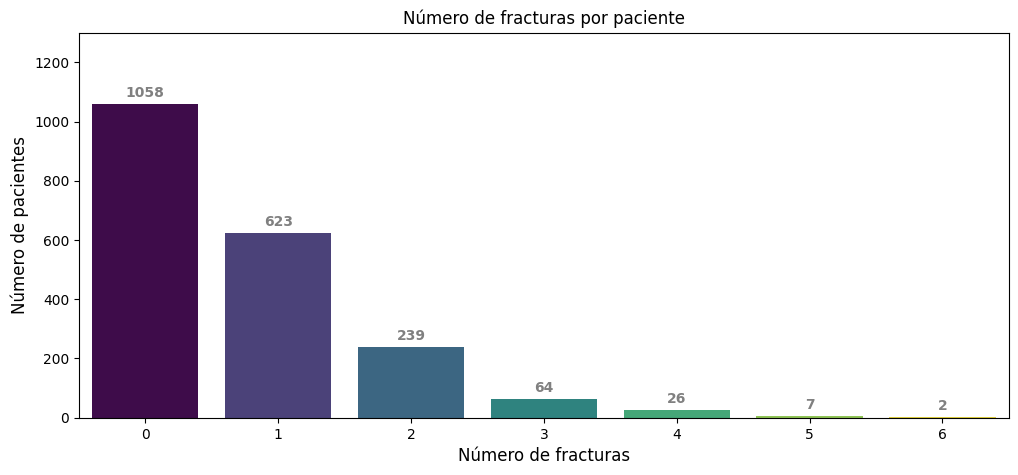

In [8]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1), 
                   hue=fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1),
                   palette='viridis', 
                   legend=False)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fontweight='bold', padding=3, color='gray')

plt.title('Número de fracturas por paciente')
plt.xlabel('Número de fracturas', fontsize=12)
plt.ylabel('Número de pacientes', fontsize=12)
plt.ylim([0,1300])
plt.show()

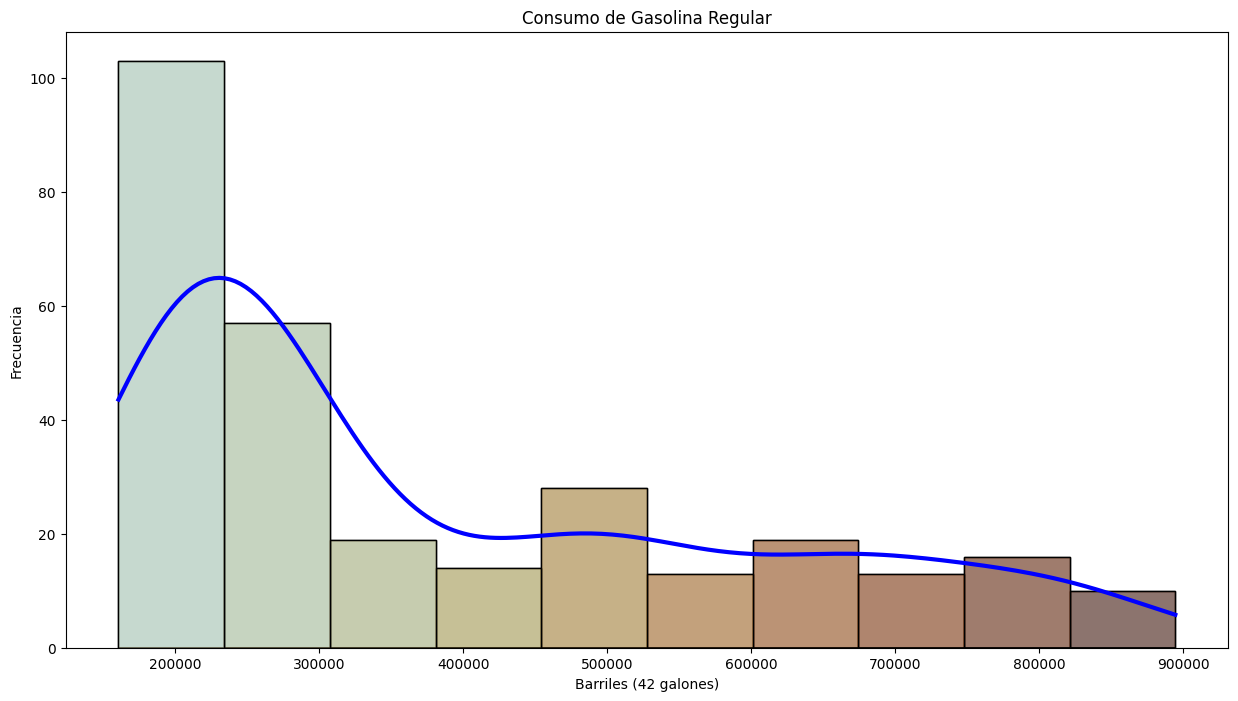

In [13]:
plt.figure(figsize=(15, 8))
consumos_df['HUE'] = pd.cut(consumos_df['Gasolina Regular'], bins=10)
ax = sns.histplot(consumos_df['Gasolina Regular'], kde=True, line_kws={'lw':3})
sns.histplot(data = consumos_df, 
             x ='Gasolina Regular', 
             hue='HUE',
             palette='YlOrBr',
             legend=False)
ax.lines[0].set_color('blue')
plt.title('Consumo de Gasolina Regular')
plt.xlabel('Barriles (42 galones)')
plt.ylabel('Frecuencia')
plt.show()

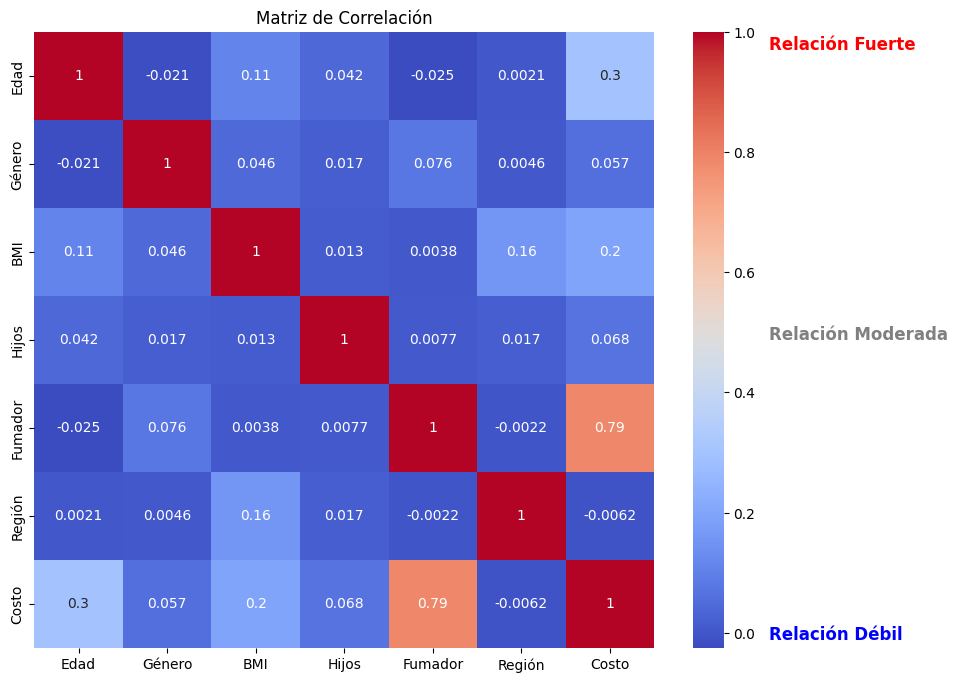

In [22]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()
# Cambiar nombre de las columnas y filas
correlation_matrix.columns = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']
correlation_matrix.index = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.text(8.3, 0.2, 'Relación Fuerte', fontsize=12, color='red', fontweight='bold')
plt.text(8.3, 3.5, 'Relación Moderada', fontsize=12, color='gray', fontweight='bold')
plt.text(8.3, 6.9, 'Relación Débil', fontsize=12, color='blue', fontweight='bold')
plt.show()